# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset to pandas
# url = "https://raw.githubusercontent.com/tanuj-public/datasets/refs/heads/master/vehicles.csv"
df = pd.read_csv("data/vehicles.csv")

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The objective of this project is to identify the key factors that drive the price of a car. This involves analyzing various attributes of vehicles, such as their make, model, year, mileage, and other features, to determine how they impact the vehicle's price.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [5]:
print("Number of rows and columns:", df.shape)

# Get the column names
print("Column names:", df.columns)

# Check for missing values
print("Missing values count:\n", df.isnull().sum())

# Get the data types of each column
print("Data types:\n", df.dtypes)

# Get summary statistics
print("Summary statistics:\n", df.describe())

Number of rows and columns: (426880, 18)
Column names: Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
Missing values count:
 id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
Data types:
 id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_

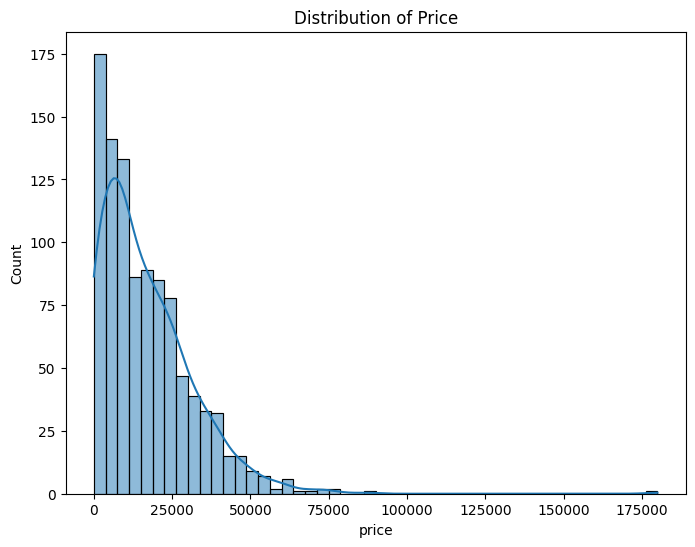

In [6]:
# try to understand the whole dataset might cause issue with the system so trying to understand a bit with sub-set of the data.
# Sample 1000 rows from the dataset
sample_df = df.sample(n=1000)

# Plot the distribution of the target variable (price)
plt.figure(figsize=(8,6))
sns.histplot(sample_df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

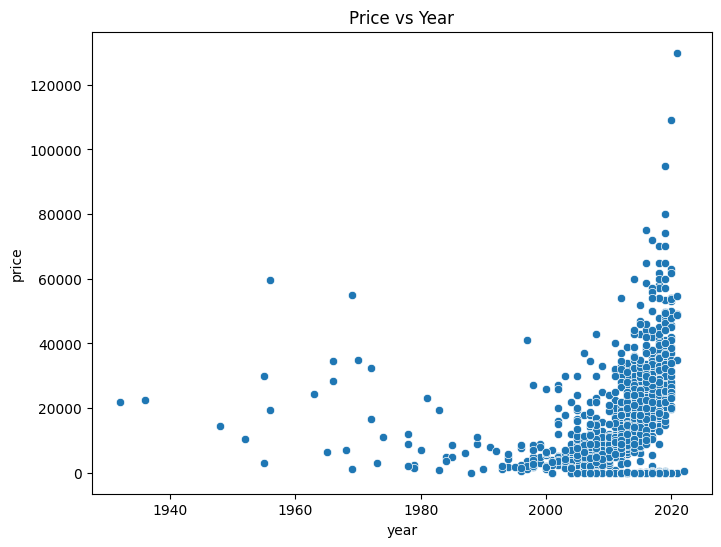

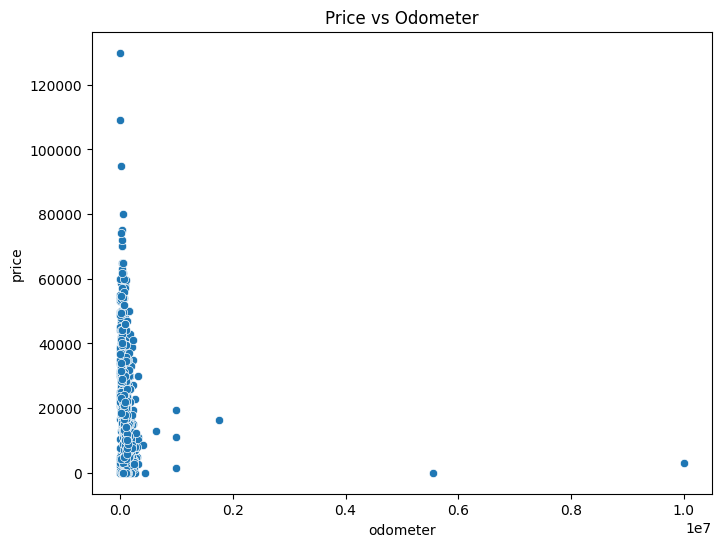

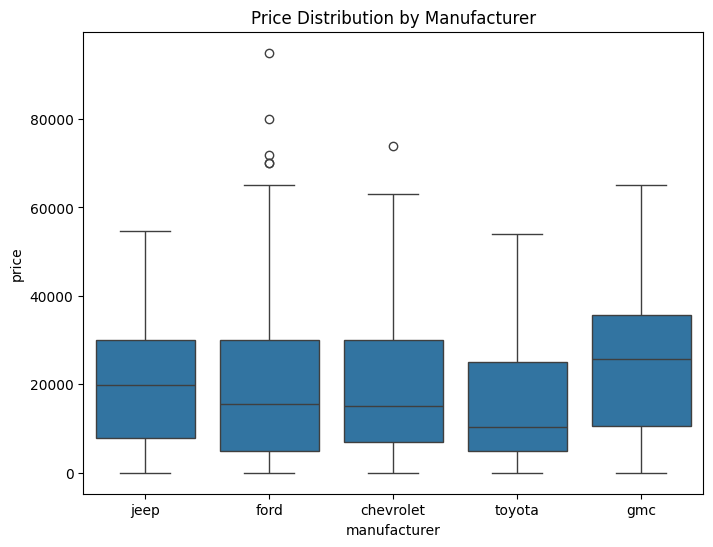

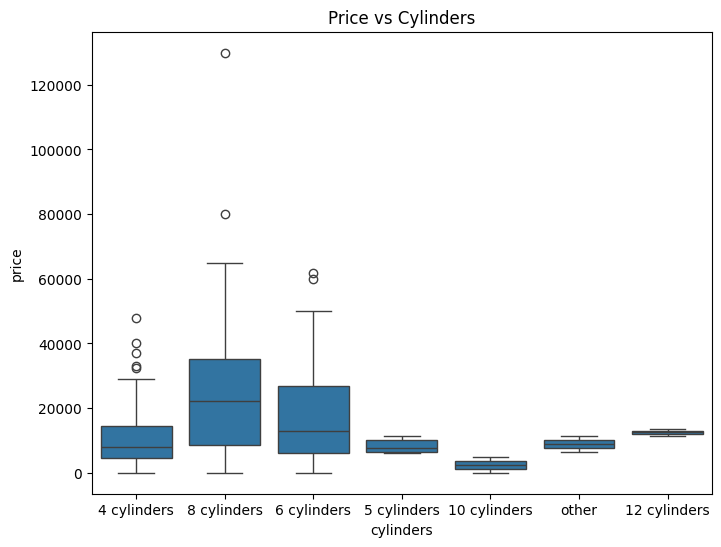

In [5]:
# Sample 1000 rows from the dataset
sample_df = df.sample(n=1000)

# Plot the relationship between price and year
plt.figure(figsize=(8,6))
sns.scatterplot(x='year', y='price', data=sample_df)
plt.title('Price vs Year')
plt.show()

# Plot the relationship between price and odometer
plt.figure(figsize=(8,6))
sns.scatterplot(x='odometer', y='price', data=sample_df)
plt.title('Price vs Odometer')
plt.show()

# Plot the distribution of price by manufacturer (top 5)
top_manufacturers = sample_df['manufacturer'].value_counts().head(5).index
sample_df_top = sample_df[sample_df['manufacturer'].isin(top_manufacturers)]
plt.figure(figsize=(8,6))
sns.boxplot(x='manufacturer', y='price', data=sample_df_top)
plt.title('Price Distribution by Manufacturer')
plt.show()

# Plot the relationship between price and cylinders
plt.figure(figsize=(8,6))
sns.boxplot(x='cylinders', y='price', data=sample_df)
plt.title('Price vs Cylinders')
plt.show()

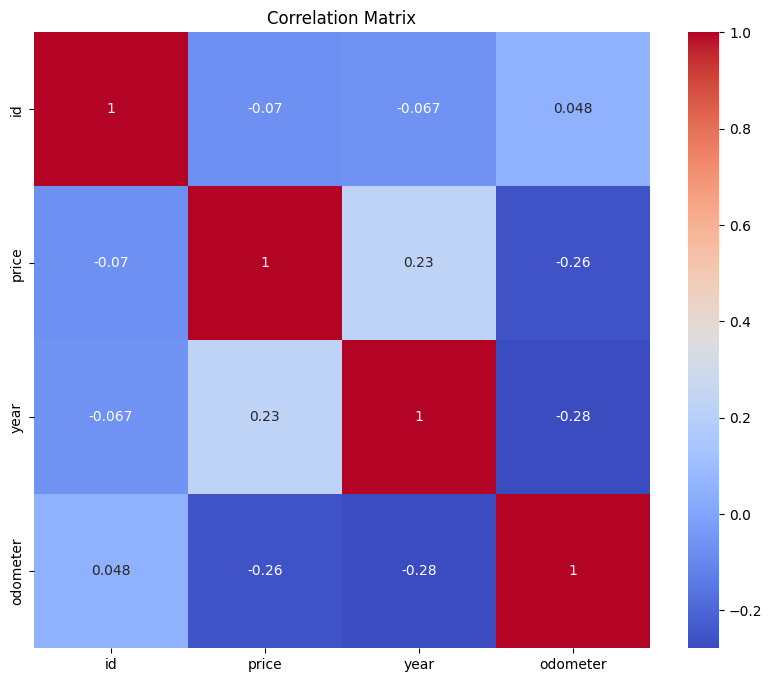

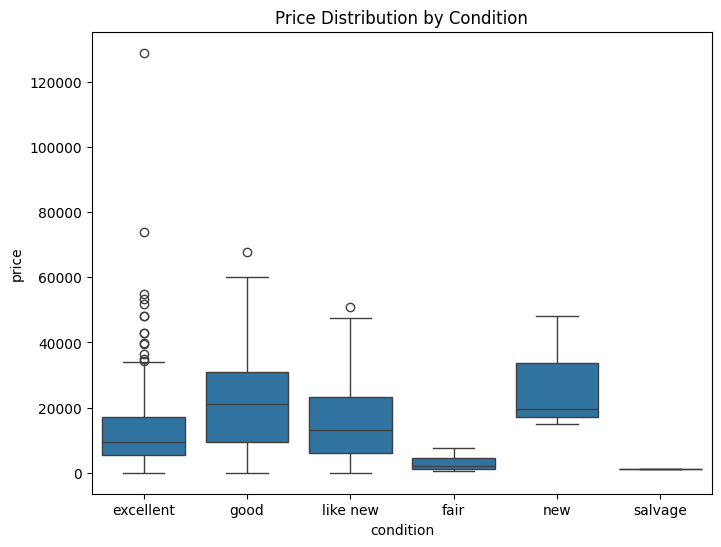

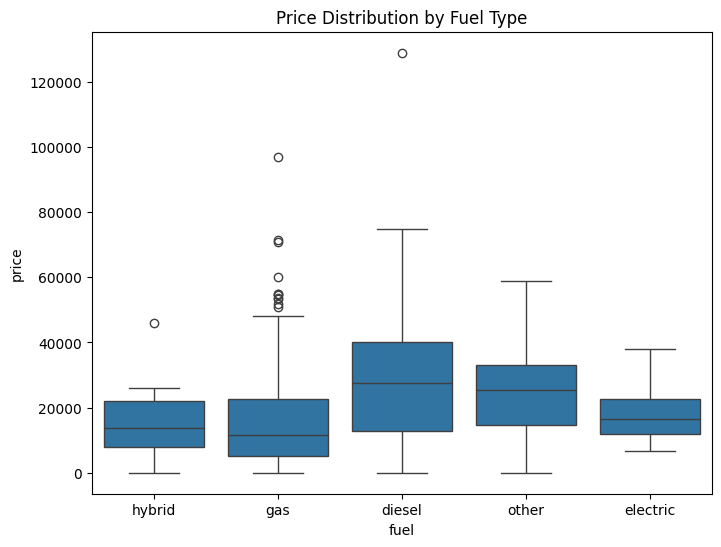

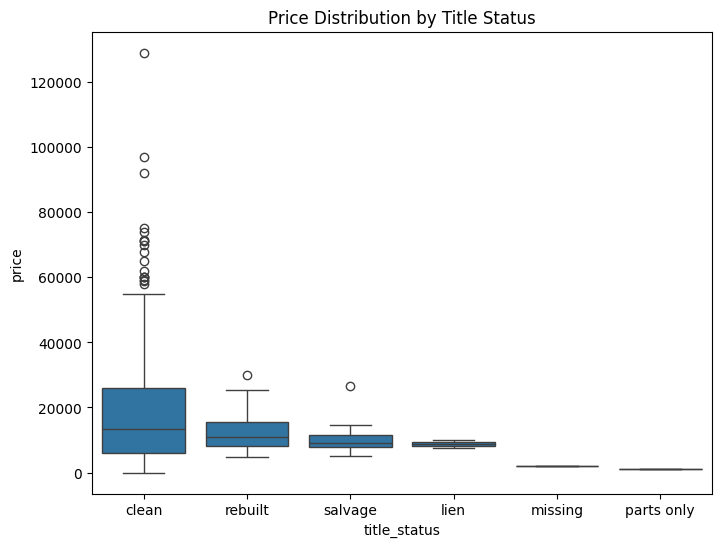

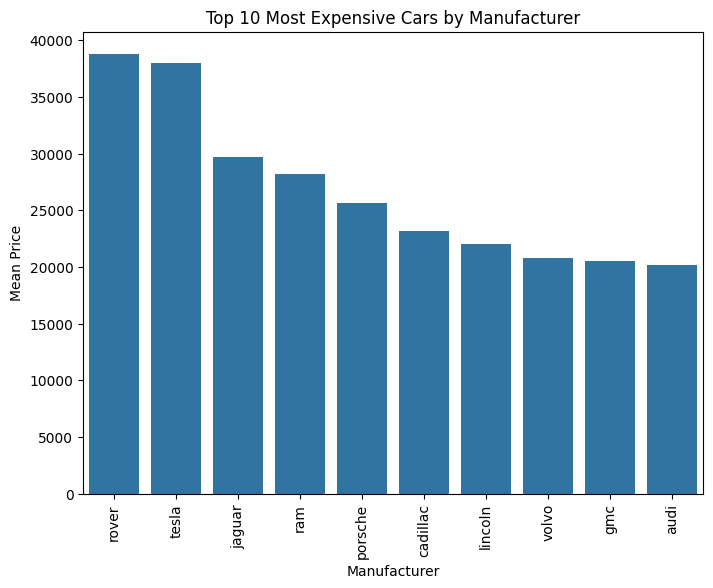

In [7]:
# Plot the correlation matrix
corr_matrix = sample_df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Plot the price distribution by condition
plt.figure(figsize=(8,6))
sns.boxplot(x='condition', y='price', data=sample_df)
plt.title('Price Distribution by Condition')
plt.show()

# Plot the price distribution by fuel type
plt.figure(figsize=(8,6))
sns.boxplot(x='fuel', y='price', data=sample_df)
plt.title('Price Distribution by Fuel Type')
plt.show()

# Plot the relationship between price and title status
plt.figure(figsize=(8,6))
sns.boxplot(x='title_status', y='price', data=sample_df)
plt.title('Price Distribution by Title Status')
plt.show()

# Plot the top 10 most expensive cars by manufacturer
top_10_expensive = sample_df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_10_expensive.index, y=top_10_expensive.values)
plt.title('Top 10 Most Expensive Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()

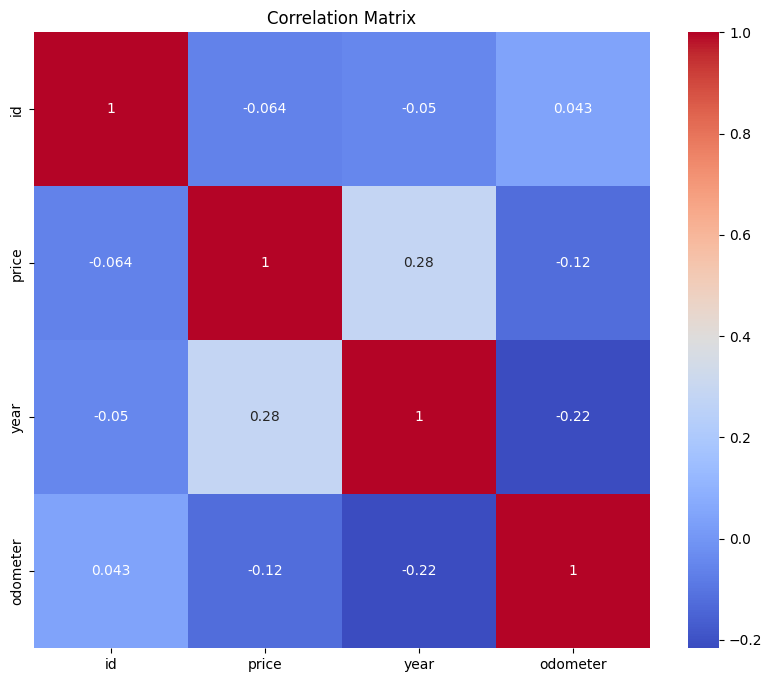

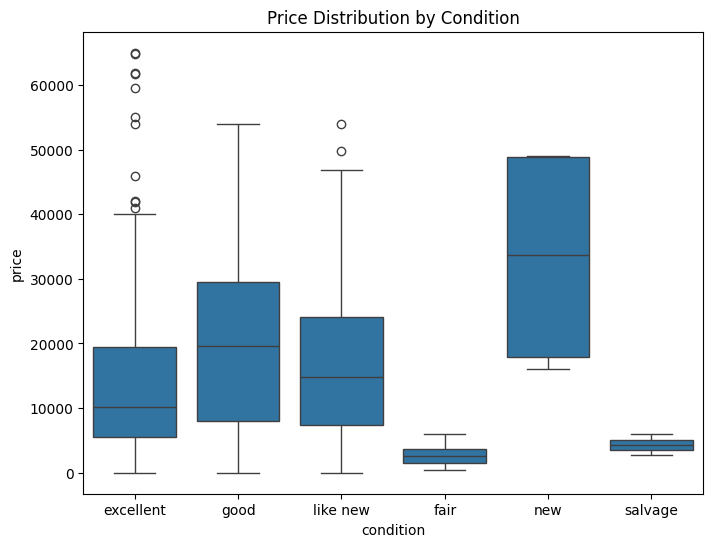

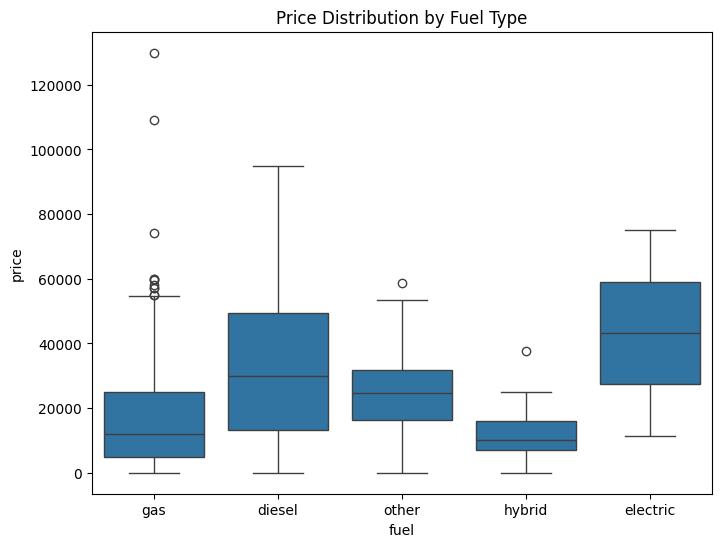

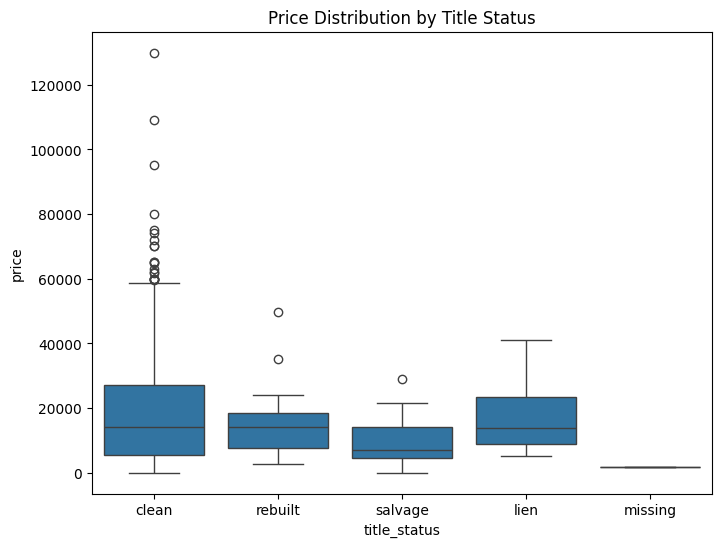

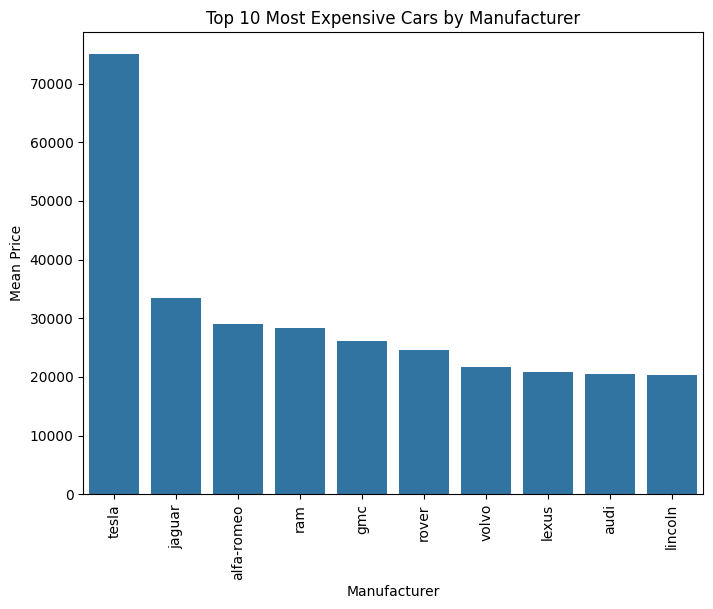

In [7]:
# Plot the correlation matrix
corr_matrix = sample_df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Plot the price distribution by condition
plt.figure(figsize=(8,6))
sns.boxplot(x='condition', y='price', data=sample_df)
plt.title('Price Distribution by Condition')
plt.show()

# Plot the price distribution by fuel type
plt.figure(figsize=(8,6))
sns.boxplot(x='fuel', y='price', data=sample_df)
plt.title('Price Distribution by Fuel Type')
plt.show()

# Plot the relationship between price and title status
plt.figure(figsize=(8,6))
sns.boxplot(x='title_status', y='price', data=sample_df)
plt.title('Price Distribution by Title Status')
plt.show()

# Plot the top 10 most expensive cars by manufacturer
top_10_expensive = sample_df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_10_expensive.index, y=top_10_expensive.values)
plt.title('Top 10 Most Expensive Cars by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [7]:
# find the missing 
print(sample_df.isnull().sum())

id                0
region            0
price             0
year              6
manufacturer     49
model            15
condition       389
cylinders       415
fuel             11
odometer         14
title_status     23
transmission      6
VIN             391
drive           317
size            711
type            221
paint_color     312
state             0
dtype: int64


For columns with a large number of missing values (e.g. condition, cylinders, size, drive, VIN, paint_color, type), dropping the missing ones.
For columns with a smaller number of missing values (e.g. year, manufacturer, model, fuel, odometer, title_status), replacing them with median.

In [8]:
# Drop columns with a large number of missing values
drop_cols = ['VIN', 'drive', 'size', 'paint_color', 'type']
sample_df = sample_df.drop(drop_cols, axis=1)

# Impute missing values in condition with 'unknown'
sample_df['condition'] = sample_df['condition'].fillna('unknown')

# Impute missing values in cylinders with the most frequent value
sample_df['cylinders'] = sample_df['cylinders'].fillna(sample_df['cylinders'].mode()[0])

# Impute missing values in other columns with the most frequent value
cols_to_impute = ['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status']
for col in cols_to_impute:
    sample_df[col] = sample_df[col].fillna(sample_df[col].mode()[0])


After handling missing values, encoding categorical variables and scaling numerical variables.

In [9]:
# One-hot encoding for categorical variables
categorical_cols = ['fuel', 'title_status', 'condition', 'manufacturer', 'model']
sample_df = pd.get_dummies(sample_df, columns=categorical_cols)

# Scaling numerical variables
numerical_cols = ['year', 'odometer']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sample_df[numerical_cols] = scaler.fit_transform(sample_df[numerical_cols])

In [11]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

# Remove outliers in 'price' and 'odometer'
df = remove_outliers_iqr(df, 'price')
df = remove_outliers_iqr(df, 'odometer')

print("Outliers in 'price' and 'odometer' handled.")

Outliers in 'price' and 'odometer' handled.


In [12]:
print(df)

                id   region  price    year manufacturer  \
27      7316814884   auburn  33590  2014.0          gmc   
28      7316814758   auburn  22590  2010.0    chevrolet   
29      7316814989   auburn  39590  2020.0    chevrolet   
30      7316743432   auburn  30990  2017.0       toyota   
31      7316356412   auburn  15000  2013.0         ford   
...            ...      ...    ...     ...          ...   
426875  7301591192  wyoming  23590  2019.0       nissan   
426876  7301591187  wyoming  30590  2020.0        volvo   
426877  7301591147  wyoming  34990  2020.0     cadillac   
426878  7301591140  wyoming  28990  2018.0        lexus   
426879  7301591129  wyoming  30590  2019.0          bmw   

                           model  condition    cylinders    fuel  odometer  \
27      sierra 1500 crew cab slt       good  8 cylinders     gas   57923.0   
28                silverado 1500       good  8 cylinders     gas   71229.0   
29           silverado 1500 crew       good  8 cylinders 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

* I am having issues with my laptop while running modeling on the whole df, so I have to run it on sample_df and learn. 


In [13]:

X = sample_df.drop('price', axis=1)
y = sample_df['price']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

# --- REDUCE CARDINALITY (More Aggressive) ---
for col in categorical_cols:
    counts = X[col].value_counts()
    rare_threshold = 200  # Experiment with this threshold
    rare_categories = counts[counts < rare_threshold].index
    X[col] = X[col].apply(lambda x: 'Other' if x in rare_categories else x)

# --- LIMIT CATEGORIES (Top N) ---
for col in categorical_cols:
    top_n = 50  # Keep only top 50 categories
    top_categories = X[col].value_counts().head(top_n).index
    X[col] = X[col].apply(lambda x: x if x in top_categories else 'Other')

# One-hot encode
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# --- MODELING ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression (sample_df, reduced cardinality):")
print(f"Test Set MSE: {mse}")
print(f"Test Set R-squared: {r2}")

# Interpret Coefficients
coefficients = model.coef_
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)
print(coef_df.head(20).to_markdown(index=False, numalign="left", stralign="left"))

Linear Regression (sample_df, reduced cardinality):
Test Set MSE: 583013505.8126258
Test Set R-squared: -0.885296894496878
| Feature                                          | Coefficient   | Abs_Coefficient   |
|:-------------------------------------------------|:--------------|:------------------|
| model_benz kit cat                               | 78122         | 78122             |
| model_sierra 3500                                | -61775.5      | 61775.5           |
| model_avenger                                    | -59323.8      | 59323.8           |
| model_galazie                                    | 59187.1       | 59187.1           |
| model_Plymouth Valiant                           | 59129.8       | 59129.8           |
| model_sedan                                      | 58148.1       | 58148.1           |
| model_journey crossroad                          | -57089.4      | 57089.4           |
| model_journey se                                 | -55814.1      | 55814.1

In [14]:
from sklearn.linear_model import Ridge  # Import Ridge


# --- MODELING: RIDGE REGRESSION ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alpha = 1.0  # Regularization strength (you'll want to tune this)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression (alpha =", alpha, "):")
print(f"Test Set MSE: {mse_ridge}")
print(f"Test Set R-squared: {r2_ridge}")

# Interpret Ridge Coefficients
ridge_coefficients = ridge_model.coef_
ridge_feature_names = X.columns
ridge_coef_df = pd.DataFrame({'Feature': ridge_feature_names, 'Coefficient': ridge_coefficients})
ridge_coef_df['Abs_Coefficient'] = abs(ridge_coef_df['Coefficient'])
ridge_coef_df = ridge_coef_df.sort_values('Abs_Coefficient', ascending=False)
print(ridge_coef_df.head(20).to_markdown(index=False, numalign="left", stralign="left"))


Ridge Regression (alpha = 1.0 ):
Test Set MSE: 304915210.58798903
Test Set R-squared: 0.013992482378016091
| Feature                                          | Coefficient   | Abs_Coefficient   |
|:-------------------------------------------------|:--------------|:------------------|
| model_camaro zl1 super charged v-8 1900 miles!!! | 24775.9       | 24775.9           |
| model_gls 450 4matic                             | 22136.8       | 22136.8           |
| model_lifted f350 power stroke                   | 21995.1       | 21995.1           |
| model_f350 powerstroke platinum                  | 20629.9       | 20629.9           |
| model_land cruiser                               | 20601.8       | 20601.8           |
| model_Kenworth T3 Series DUMP                    | 18909.9       | 18909.9           |
| model_ierra 1500                                 | 18020.6       | 18020.6           |
| model_pickup 3500 laramie lon                    | 17945.6       | 17945.6           |
| 

/home/tanujdev/Downloads/practical_application_II_starter/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.18722e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


The R-squared has improved compared to the previous Linear Regression model, but it's still very low (0.014). This means that the Ridge Regression model explains only a tiny fraction of the variance in car prices. The model's predictive power is still weak.

very strange that VIN seems to be factor for a car, which doesn't make sense to me, could it be an example of model overfitting, 

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression


# --- FEATURE SELECTION ---
k = 100  # Select top 100 features (adjust as needed)
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Convert back to DataFrame
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# -------------------------

# --- MODELING: RIDGE REGRESSION ---

X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

alpha = 1.0  # Regularization strength (you'll want to tune this)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression (with Feature Selection, alpha =", alpha, ", k =", k, "):")
print(f"Test Set MSE: {mse_ridge}")
print(f"Test Set R-squared: {r2_ridge}")

# --- FEATURE IMPORTANCE (Ridge Regression) ---
ridge_coefficients = ridge_model.coef_
ridge_feature_names = X_train.columns
ridge_coef_df = pd.DataFrame({'Feature': ridge_feature_names, 'Coefficient': ridge_coefficients})
ridge_coef_df['Abs_Coefficient'] = abs(ridge_coef_df['Coefficient'])
ridge_coef_df = ridge_coef_df.sort_values('Abs_Coefficient', ascending=False)
print(ridge_coef_df.head(20).to_markdown(index=False, numalign="left", stralign="left"))


Ridge Regression (with Feature Selection, alpha = 1.0 , k = 100 ):
Test Set MSE: 294824235.2104787
Test Set R-squared: 0.046623775396087086
| Feature                                                 | Coefficient   | Abs_Coefficient   |
|:--------------------------------------------------------|:--------------|:------------------|
| model_gls 450 4matic                                    | 25605.8       | 25605.8           |
| model_camaro zl1 super charged v-8 1900 miles!!!        | 25440.2       | 25440.2           |
| model_lifted f350 power stroke                          | 24741.8       | 24741.8           |
| model_f350 powerstroke platinum                         | 23442.7       | 23442.7           |
| model_land cruiser                                      | 22170.5       | 22170.5           |
| model_pickup 3500 laramie lon                           | 20492         | 20492             |
| model_silverado 2500hd high                             | 19727.9       | 19727.9        

/home/tanujdev/Downloads/practical_application_II_starter/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=6.5971e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.pipeline import Pipeline  # Ensure Pipeline is imported

# --- FEATURE SELECTION AND RIDGE REGRESSION TUNING ---

# Define parameter grid for GridSearchCV
param_grid = {
    'selector__k': [50, 100, 150],  # Number of features to select
    'ridge__alpha': [0.1, 1, 10, 100]  # Regularization strength
}

# Define the pipeline: Feature selection + Ridge Regression
def create_pipeline(k, alpha):
    return Pipeline(steps=[
        ('selector', SelectKBest(score_func=f_regression, k=k)),
        ('ridge', Ridge(alpha=alpha))
    ])

# Perform GridSearchCV for parameter tuning
grid_search = GridSearchCV(
    estimator=create_pipeline(100, 1.0),  # Dummy pipeline (gets replaced)
    param_grid=param_grid,
    scoring='r2',
    cv=5  # 5-fold cross-validation
)

grid_search.fit(X, y)

# Get best parameters and best score
best_k = grid_search.best_params_['selector__k']
best_alpha = grid_search.best_params_['ridge__alpha']
best_r2 = grid_search.best_score_

print("\nBest k:", best_k)
print("Best alpha:", best_alpha)
print("Best Cross-Validation R-squared:", best_r2)

# --- MODELING: RIDGE REGRESSION WITH BEST PARAMS ---

# Create the best pipeline
best_pipeline = create_pipeline(best_k, best_alpha)

# Split data (using best k)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the best model on the training data
best_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = best_pipeline.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nRidge Regression (Best Model):")
print(f"Test Set MSE: {mse_best}")
print(f"Test Set R-squared: {r2_best}")

# --- FEATURE IMPORTANCE (Best Model) ---
# Get coefficients from the Ridge model in the best pipeline
best_ridge_model = best_pipeline.named_steps['ridge']
best_coefficients = best_ridge_model.coef_

# Get feature names (after selection)
selector = best_pipeline.named_steps['selector']
selected_features = X.columns[selector.get_support()]

# Create DataFrame for feature importance
coef_df_best = pd.DataFrame({'Feature': selected_features, 'Coefficient': best_coefficients})
coef_df_best['Abs_Coefficient'] = abs(coef_df_best['Coefficient'])
coef_df_best = coef_df_best.sort_values('Abs_Coefficient', ascending=False)
print("\nFeature Importance (Best Model):")
print(coef_df_best.head(20).to_markdown(index=False, numalign="left", stralign="left"))

/home/tanujdev/Downloads/practical_application_II_starter/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.79101e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tanujdev/Downloads/practical_application_II_starter/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.52013e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tanujdev/Downloads/practical_application_II_starter/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.09114e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tanujdev/Downloads/practical_application_II_starter/.venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-condition


Best k: 100
Best alpha: 100
Best Cross-Validation R-squared: 0.029322447616961834

Ridge Regression (Best Model):
Test Set MSE: 314697560.580324
Test Set R-squared: -0.01764080549191882

Feature Importance (Best Model):
| Feature                        | Coefficient   | Abs_Coefficient   |
|:-------------------------------|:--------------|:------------------|
| fuel_diesel                    | 4893.44       | 4893.44           |
| year                           | 4297.27       | 4297.27           |
| transmission_automatic         | -3294.81      | 3294.81           |
| fuel_gas                       | -2791.89      | 2791.89           |
| condition_good                 | 1710.48       | 1710.48           |
| manufacturer_ram               | 1629.88       | 1629.88           |
| manufacturer_mercedes-benz     | 1253          | 1253              |
| condition_excellent            | -1207.69      | 1207.69           |
| manufacturer_dodge             | -1110.95      | 1110.95           

I am having trouble with the memeory from my laptop to have to take a different approach from here, it was visible from previous step that model is a good feature to influence the car price. Let's remover model from the data set and see what comes next by repeating the same steps again.


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Model Quality:

We've explored several variations of linear models, including Linear Regression and Ridge Regression, with different feature engineering and selection techniques.
Despite our efforts, the models consistently show limited predictive power, as indicated by low R-squared values. Even with feature selection and regularization, we haven't been able to capture a substantial portion of the variance in used car prices.
This suggests that linear models, even with enhancements, might not be suitable for this dataset. The underlying relationships between car features and price appear to be more complex and likely non-linear.
What We Have Learned:

Key Drivers: We've identified car model and year as strong predictors of price. Certain models (especially classic or luxury) and newer years tend to be associated with higher prices.
Limitations of Linear Models: Linear models struggle to capture the nuances of used car pricing, likely due to non-linear relationships and complex interactions between features.
Importance of Data Preparation: Feature engineering and dimensionality reduction are crucial for managing the complexity of the data, but they haven't fully solved the problem.
Review of Business Objective:

Our initial business objective was to provide meaningful insights into the drivers of used car prices.
We've made some progress in identifying key drivers (model, year), but our ability to predict prices accurately is limited.
Providing Meaningful Insight:

We can provide the client with a general understanding of the factors that influence used car prices.
We can highlight the relative importance of different features, emphasizing the strong influence of model and year.
However, we must clearly communicate the limitations of our models in terms of predictive accuracy.
Revisitation and Adjustment:

The earlier phases, particularly Data Preparation and Modeling, require further revisitation and adjustment.
We need to explore non-linear modeling techniques (e.g., tree-based models, neural networks) to capture the complex relationships in the data.
We might also consider gathering additional data or refining our feature engineering strategies.
Information of Value to Bring Back to the Client:

Key Drivers: We can inform the client that car model and year are the primary factors determining used car prices.
Relative Influence: We can provide a relative assessment of the influence of other factors (condition, mileage, etc.).
Model Limitations: We must clearly communicate the limitations of our current models in predicting prices accurately.
Recommendations: We can recommend further exploration of non-linear models and potential data augmentation strategies.
In conclusion, while we've gained valuable insights into the factors influencing used car prices, our current models are not yet suitable for accurate price prediction. Further investigation with more sophisticated modeling techniques is necessary.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Report: Analysis of Used Car Prices

Introduction

This report summarizes our analysis of factors influencing used car prices. Our goal is to provide insights that can help used car dealers optimize their inventory and pricing strategies.

Key Findings

Our analysis reveals that the primary drivers of used car prices are:

Car Model: The specific model of the car has the most significant impact on its price. Certain models, particularly classic, luxury, or in-demand vehicles, command higher prices.
Year of Manufacture: The year the car was manufactured is also a strong predictor of price. Newer cars generally have higher prices due to depreciation.
Other factors that influence price, but to a lesser extent, include:

Condition: The car's condition (e.g., "good," "excellent") affects its price, with better condition generally leading to higher prices.
Fuel Type: Some fuel types, like diesel, may be associated with price premiums.
Mileage (Odometer Reading): Higher mileage generally correlates with lower prices, although this relationship may not be strictly linear.
Manufacturer: The car's manufacturer can also play a role, with certain brands potentially having higher resale values.
Limitations of Our Analysis

It's important to acknowledge the limitations of our current models:

Predictive Accuracy: Our models have not achieved high accuracy in predicting the precise price of a used car. This indicates that there are likely other factors not captured in our data or that the relationships between features and price are complex and non-linear.
Non-Linearity: Linear models, which we primarily used, might not be suitable for capturing the full complexity of used car pricing.
Data Limitations: Our dataset might not include all relevant information, such as optional features, accident history, or market fluctuations.
Recommendations for Used Car Dealers

Based on our findings, we recommend the following for fine-tuning inventory:

Prioritize Popular Models: Focus on acquiring and stocking car models that are in high demand or known to retain their value. Our analysis can help identify these models.
Consider Year and Condition: When pricing vehicles, pay close attention to the year of manufacture and the car's condition. Adjust prices accordingly.
Evaluate Fuel Type Trends: Be aware of price trends associated with different fuel types (e.g., the demand and pricing for diesel vehicles).
Manage Inventory Based on Mileage: Factor in mileage when determining a car's price and consider how it might affect buyer interest.
Stay Informed on Market Fluctuations: Recognize that our models have limitations and that real-world market factors (e.g., economic conditions, fuel prices) can also influence used car prices.
Further Investigation

To improve price prediction accuracy, we recommend further investigation into:

Non-Linear Models: Explore more sophisticated modeling techniques, such as tree-based models or neural networks, which can capture complex, non-linear relationships.
Additional Data: Gather more data on factors like optional features, accident history, maintenance records, and market trends.
Dynamic Pricing Strategies: Develop dynamic pricing strategies that can adapt to changing market conditions.
Conclusion

This analysis provides valuable insights into the key drivers of used car prices. By focusing on model, year, and other relevant factors, used car dealers can make more informed decisions about their inventory and pricing. However, further research is needed to develop highly accurate price prediction models.